In [22]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as scst
import pylab 

datafilename = "data_processed-without-outliers.csv"
d = pd.read_csv(datafilename)
print("Loading", len(d), "lines of data (outliers removed).")

resultsfilename = "data_stats-without-outliers.csv"
st = pd.read_csv(resultsfilename)
print("Loading", len(st), "lines of stats.")



Loading 15166 lines of data (outliers removed).
Loading 844 lines of stats.


In [2]:
designers = st[st["isDesigner"]]
display(designers[["RT", "AUC"]].corr())
print("Coefficient: %.3f, p-value: %.4f" % scst.pearsonr(designers["RT"], designers["AUC"]))

,RT,AUC
RT,1.000000,0.088449
AUC,0.088449,1.000000


Coefficient: 0.088, p-value: 0.0614


In [3]:
nondesigners = st[st["isDesigner"] == False]
display(nondesigners[["RT", "AUC"]].corr())
print("Coefficient: %.3f, p-value: %.4f" % scst.pearsonr(nondesigners["RT"], nondesigners["AUC"]))

,RT,AUC
RT,1.000000,0.012533
AUC,0.012533,1.000000


Coefficient: 0.013, p-value: 0.8036


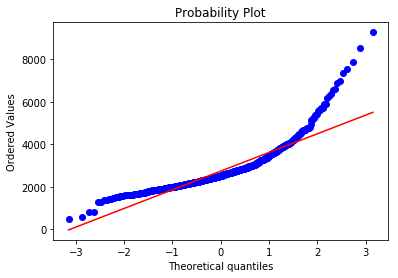

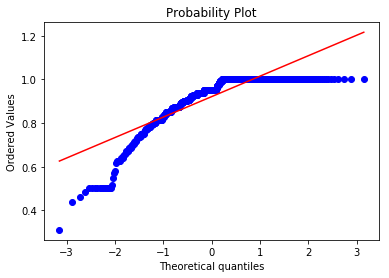

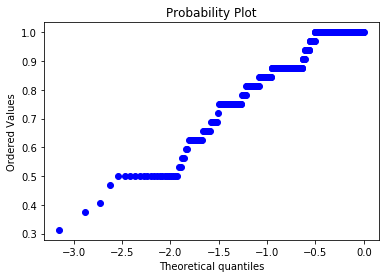

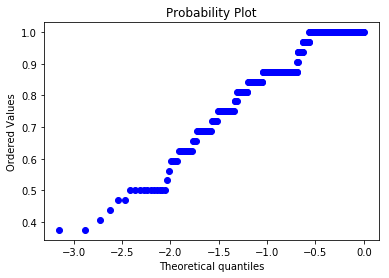

In [26]:
scst.probplot(st["RT"], dist="norm", plot=pylab)
pylab.show()
scst.probplot(st["AUC"], dist="norm", plot=pylab)
pylab.show()
scst.probplot(st["AUC_word"], dist="norm", plot=pylab)
pylab.show()
scst.probplot(st["AUC_nonword"], dist="norm", plot=pylab)
pylab.show()

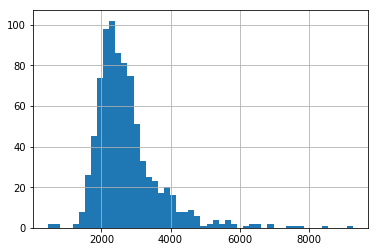

In [31]:
st["RT"].hist(bins=50)

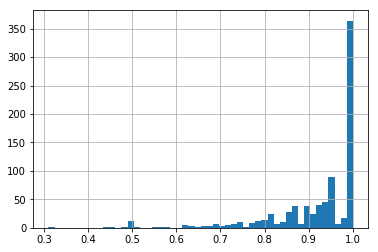

In [30]:
st["AUC"].hist(bins=50)

In [34]:
from scipy.stats import normaltest
normaltest(d["RT"])

NormaltestResult(statistic=16632.01169196867, pvalue=0.0)